<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Proportional-Integral-(PI)-Control" data-toc-modified-id="Proportional-Integral-(PI)-Control-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Proportional-Integral (PI) Control</a></span><ul class="toc-item"><li><span><a href="#Example:-PI-control-design-using-the-direct-method" data-toc-modified-id="Example:-PI-control-design-using-the-direct-method-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example: PI control design using the direct method</a></span></li></ul></li><li><span><a href="#Common-Controller-Design-Metrics-for-Closed-Loop-Systems-Displaying-Underdamped-Second-Order-Behavior" data-toc-modified-id="Common-Controller-Design-Metrics-for-Closed-Loop-Systems-Displaying-Underdamped-Second-Order-Behavior-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Common Controller Design Metrics for Closed Loop Systems Displaying Underdamped Second-Order Behavior</a></span><ul class="toc-item"><li><span><a href="#Percent-Overshoot" data-toc-modified-id="Percent-Overshoot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Percent Overshoot</a></span></li><li><span><a href="#Settling-Time" data-toc-modified-id="Settling-Time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Settling Time</a></span></li></ul></li><li><span><a href="#Proportional-Derivative-(PD)-Control" data-toc-modified-id="Proportional-Derivative-(PD)-Control-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Proportional-Derivative (PD) Control</a></span><ul class="toc-item"><li><span><a href="#Example:-PD-control-design-using-the-direct-method" data-toc-modified-id="Example:-PD-control-design-using-the-direct-method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example: PD control design using the direct method</a></span></li></ul></li><li><span><a href="#Challenge:-Controller-Design" data-toc-modified-id="Challenge:-Controller-Design-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge: Controller Design</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Model Development</a></span></li><li><span><a href="#Controller-Design" data-toc-modified-id="Controller-Design-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Controller Design</a></span></li><li><span><a href="#Controller-Validation:-Simulation" data-toc-modified-id="Controller-Validation:-Simulation-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Controller Validation: Simulation</a></span></li></ul></li></ul></li></ul></div>

# Challenge

Design a closed loop feedback controller that can control both the system's response time and its steady state error.

# Proportional-Integral (PI) Control

The proportional control term $P(s)$ looks at how far our system is from where we want it to be, but sometimes (for example, for a [first-order plant](../Week05_Monday/Week05_Monday.ipynb#Example)), this is not enough to ensure that our system will be able to track a step input without any steady-state error. The proportional-integral controller solves this problem by looking at how *long* our system has been away from $r(s)$ as well as how far it is at any given moment. The controller transfer function for a PI controller is:

\begin{equation}
C(s) = K_p+K_i\frac{1}{s}
\end{equation}

This controller, like the proportional controller, gives an input to the system that is proportional to the error signal $e(s)$, but the additional term $\frac{K_i}{s}$ does something different. It pushes on the system proportional to the *integral of the error.* Think of it this way-- if the system were sitting some constant distance away from the desired value $r(s)$, the integral of the error would increase steadily, and the $K_i$ term would push harder and harder to try to eliminate the error. 

Let's look at an example of PI control applied to a first order system.

**Note: In the following figure, the plant is labeled $P(s)$. You will, in your travels, likely see plant transfer functions denoted by many different letters.**

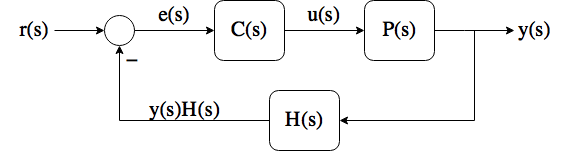

## Example: PI control design using the direct method

Suppose we have the same first order plant we worked with in the example from the [last reading](../Week05_Monday/Week05_Monday.ipynb#Example):

\begin{equation}
P(s) = \frac{y(s)}{r(s)}= \frac{1}{s+1}
\end{equation}

We wish to control this system's output, and we will assume that $H(s)=1$ in the feedback path of the "canonical block diagram" for feedback control, which means that any sensor needed to measure the system's output has a gain of 1 and no dynamics or filtering to consider. The plant transfer function has one eigenvalue at $s=-1$. In the last reading, we saw that a proportional controller could not achieve perfect tracking for this first-order plant without setting $K_p=\infty$, but that we could arbitrarily move the closed-loop system's eigenvalue to any real value we wanted, to achieve a desired settling time. To see how and/or if this might change using a proportional-integral controller, we will first compute the closed-loop transfer function $G_{cl}(s)=\frac{y(s)}{r(s)}$.

\begin{equation}
G_{cl}(s) = \frac{PC}{1+PCH}
\end{equation}

This leads to the following closed-loop transfer function:

\begin{equation}
G_{cl}(s) = \frac{\left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}{1+ \left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}
\end{equation}

After clearing the fractions, this leads to the following simplified form of $G_{cl}(s)$:

\begin{equation}
G_{cl}(s) = \frac{\left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}{1+ \left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}\cdot \frac{s^2+s}{s^2+s} = \frac{K_ps+K_i}{s^2+(K_p+1)s + K_i}
\end{equation}

Just by looking at the form of the closed-loop transfer function, the following can be ascertained:

1. The closed-loop transfer function (CLTF) has a *zero* even though the plant transfer function did not.
2. The closed-loop system is 2nd order, even though the plant transfer function was first order! PI control always adds a pole to the system because of the integral action, which stores energy in the act of "remembering" how far away the system's output $y(s)$ has been over time from the reference input $r(s)$.
4. For this particular plant, positive values of $K_p$ and $K_i$ will maintain system stability.
3. The final value theorem predicts that the output $y(s)$ will match the reference input $r(s)$ for a step change in $r(s)$ for *any positive value of* $K_i$ for this system (check this yourself!).

What's more, if we look at the closed-loop system eigenvalues, which we can find using the quadratic formula:

\begin{equation}
s = \frac{-\left(K_p+1\right) \pm \sqrt{(K_p+1)^2-4K_i}}{2}
\end{equation}

We can see that we have full control, through $K_p$ and $K_i$, of both the real and complex part of our eigenvalues, meaning that if the desired behavior is underdamped we have full control over both $\zeta$ and $\omega_n$. This means that although we've increased the system order by 1 in adding integral action to our control system, we have retained the ability to fully manipulate the system's dynamics for performance goals like rise time, settling time, damping ratio, natural frequency, etc. 

But how might we know what to set our desired $\zeta$ and $\omega_n$ to? Some common performance goals for systems that display underdamped second-order behavior under closed loop control are given below. Note that because PI control adds a pole to your system, all PI-controlled closed-loop systems will be at least second order. 

# Common Controller Design Metrics for Closed Loop Systems Displaying Underdamped Second-Order Behavior

While minimizing steady-state error is nearly always a goal of a feedback control system, controlling its *transient* behavior is also vital to achieving good performance.

Many times, attempting to make a closed-loop system settle quickly to its steady state means that the engineer will need to live with at least some oscillation. Finding the "right" damping ratio $\zeta$ and natural frequency $\omega_n$ for a closed loop system that will act like an underdamped second-order system is often a delicate balance between different design goals.

The two most common design metrics we will use in ME480 for closed loop systems that display underdamped second-order behavior can include, but are not limited to, the following quantities:

## Percent Overshoot

Often, it is important to limit the system's overshoot in response to a step input. [Percent overshoot](https://en.wikipedia.org/wiki/Overshoot_(signal)#:~:text=For%20a%20step%20input%2C%20the,overshoot%20in%20an%20electronics%20context.) can be found approximately for a standard-form, second-order system as:

$$PO = 100e^{-\frac{\pi \zeta}{\sqrt{1-\zeta^2}}}$$

This formula can be manipulated to produce a goal for the damping ratio $\zeta$ of the closed-loop control system's dominant eigenvalue pair.

## Settling Time

Often, the speed at which a system reaches steady state is important. An approximate formula for the $2\%$ [settling time](https://en.wikipedia.org/wiki/Settling_time) of a system that displays underdamped second order behavior can be found as:

$$t_{s,2\%} = \frac{4}{\zeta\omega_n}$$

This can be used to help determine a goal for a closed-loop system's damping raio $\zeta$ if a desired $\omega_n$ is known, or to determine $\omega_n$ if the goal for $\zeta$ is known.



PI control is guaranteed to produce at least second-order behavior (since it adds a pole). It certainly isn't *always* the case that an engineer will want the closed-loop poles to be oscillatory. If overdamped behavior is desired, a control engineer can design gains $k_p$ and $k_i$ such that the slower of the system's two [effective time constants](../Week03_Monday/Week03_Monday.ipynb#Overdamped-systems) has a desirable value.

Another type of control that is common, but nearly always with plant models that *begin* as second-order or higher systems, is called Proportional-Derivative (PD) control, which is introduced below.

# Proportional-Derivative (PD) Control

The transfer function for PD control is, in general,

\begin{equation}
C(s) = K_p + K_ds
\end{equation}

In contrast to the PI controller, which reacts to both the magnitude of the error the area under the error curve $e(t)$ as the system attempts to reach steady state, the PD controller reacts to the error through $K_p$ and the *speed at which the error signal is changing* through $K_d$, which reacts proportionally to the error signal's time derivative. You might think of this as a type of "virtual damper" the way you might think of $K_p$ as a virtual spring. PD control is very popular for second and higher order systems. At this point in the course, we're still limited to analyzing the behavior of a closed-loop system by directly studying the solutions to its characteristic equation, so let's look at a second order example.


## Example: PD control design using the direct method

Consider the following system:

If we use the linear graph method, we might get a transfer function for the system that looks something like the transfer function below assuming an ideal force source $F_i$ as our input and the mass's velocity $v$ as our output:

\begin{equation}
P_v(s) = \frac{v(s)}{F(s)} = \frac{\frac{1}{m}}{s+\frac{b}{m}}
\end{equation}

If we wish to control the mass's position rather than its velocity, we can simply integrate this transfer function to obtain a model of the mass's *position* in response to the force input:

\begin{equation}
P_p(s) = \frac{x(s)}{F(s)} = \frac{\frac{1}{m}}{s^2 + \frac{b}{m}s}
\end{equation}

Let's try a PD controller as our controller transfer function $C(s)$, and let's assume once again that the sensor or feedback transfer function $H(s)=1$. Computing the transfer function $G_{cl}(s) = \frac{x(s)}{r(s}$, where $r(s)$ is our position request for the controlled mass, we get:

\begin{equation}
G_{cl}(s) = \frac{\frac{K_p+K_ds}{ms^2+bs}}{1+\frac{K_p+K_ds}{ms^2+bs}}
\end{equation}

Clearing fractions gives us our final closed-loop transfer function from $r(s)$ to $x(s)$:

\begin{equation}
G_{cl}(s) = \frac{K_p+K_ds}{ms^2+(b+K_d)s + Kp}
\end{equation}

Similarly to the PI controller for our first order system, the PD controller on our simple example second order system adds a zero, ensures zero steady-state error for a step on $r(s)$, and allow the control of both the real and complex part of our eigenvalues.  However, **PD control does not guarantee of zero steady-state error for any second order system!** It is possible to have a situation where a PD controller does not allow for perfect tracking for a step input! **This will occur for any system that would not achieve perfect steady state tracking of a step input under P control.** The $k_d$ term is always multiplied by $s$, so it will not show up in the FVT calculation for a step input.



# Challenge: Controller Design



Your friend has a small, cylindrical pond in their garden that is home to fish, frogs, lilypads, and other assorted flora and fauna. The pond is fed by a diverting some flow from a natural spring that provides running water to your friend's house.

The plants and animals in the pond need a fresh supply of water circulating into the pond all the time. Therefore, the pond is equipped with a small outlet hole near the bottom that feeds a waterfall feature elsewhere in the garden. After it passes through the garden, all water is fed back into the spring's stream.

One might think this means that the stream could just be allowed to maintain the pond's water level on its own. However, some of the species in the pond are *extremely* sensitive to the water level, so the inflow must be controlled automatically by an external system.

Therefore, your friend has asked you to design a system that will automatically maintain the pond's water level over time using a closed-loop feedback controller. **It is important to your friend that the pond maintains its height precisely at steady state, with zero steady state error.** Your friend also asks that if the pond is subjected to a sudden change in required water height, it should be able to settle to at least 98% of its goal depth in under 10 seconds to avoid disturbing the pond's wildlife. The pond's height can overshoot its goal value by up to 10% under closed loop control without any negative effects, but excessive oscillations are undesirable.

You have some experience with Arduino, and have found a motorized valve online that will allow the arduino to precisely control the  volumetric flow rate into the pond, acting like an approximately idealized flow source. You have also found a "float" sensor that will measure the height of the water in the pond.

A crude schematic of the setup is shown in the figure below.


**Fixed Assumptions**
* The pond's diameter is 1 meter
* For this first iteration of our design, we will assume that any dynamics and/or scaling of the motorized valve can be neglected. 
* Also for this first iteration of the design, we will assume that the float sensor has no significant internal dynamics or scaling, meaning that the height is measured "perfectly." 
* To aid in the plant modeling portion of your control system design, your friend turned off all sources of water into the pond and recorded its water height as it drained out of the outlet hole. The data for this test are included in this assignment folder. To view them, yout can use the following example code:

```octave
data = load('pond_height.txt');
time = data(:,1);% time recorded in seconds
height = data(:,2);%pond height recorded in meters
```


**Deliverables**

* Using the data, develop an appropriate plant model P(s) for the pond that provides pond height (depth) as an output and takes flow rate from the arduino as an input. 
* Using the data from your test and the specifications given by your friend, design a P, PI, or PD controller as appropriate that meets **all of** the design specifications. 
* Report (with units) any and all control gains that result from your design.
* Simulate a scenario in which the pond begins at 0.3m (12") of water height, and a change in environmental conditions leads your friend to request a 0.1m *increase* in pond water height.

Use the markdown cell below to provide any hand-calculations, drawings, etc. you may have. You can add extra markdown cells if needed. Use the code cell below to show any Octave/Matlab code you develop for your step test(s) and to provide the requested plots. *Your code must run in this octave cell for credit*. As always, you may add more cells if needed, but *do not delete the ones we provided for your answers*.


### Model Development

Using the data, develop an appropriate plant model P(s) for the pond that provides pond height (depth) as an output and takes flow rate from the arduino as an input. Show the models development and final form that can be used in a controller model.

In [2]:
data = load('pond_height.txt');
time = data(:,1);% time recorded in seconds
height = data(:,2);%pond height recorded in meters

figure
plot(time,height)
xlabel('Time (s)')
ylabel('Pond Height (m)')

The plot shows that the draining of the pond follows a exponential decay pattern. For this reason, I chose to model the system as first order. This means that there is only one significant, independent energy storing element. For this system specifically, the large pond has fluid capacitance, which will be the one independent energy storing element in this system. There is also expected to be a dissipative element in this system, such as some fluid resistance at the outlet orifice nozzle. 

In [7]:
h0 = 0.3;
hss = 0; 
htau = 0.368*h0;
tau = time(find(height>htau,1,'last'))

tau =  5.8509


### Controller Design

* Using the data from your test and the specifications given by your friend, select a controller type (P, PI, or PD) that can meet **all of** the design specifications and then complete the controller design by determining all controller gains ($k_p$ and/or $k_d$ and/or $k_i$).
* Show your controller design process and your final controller gains with units in the markdown cell below.

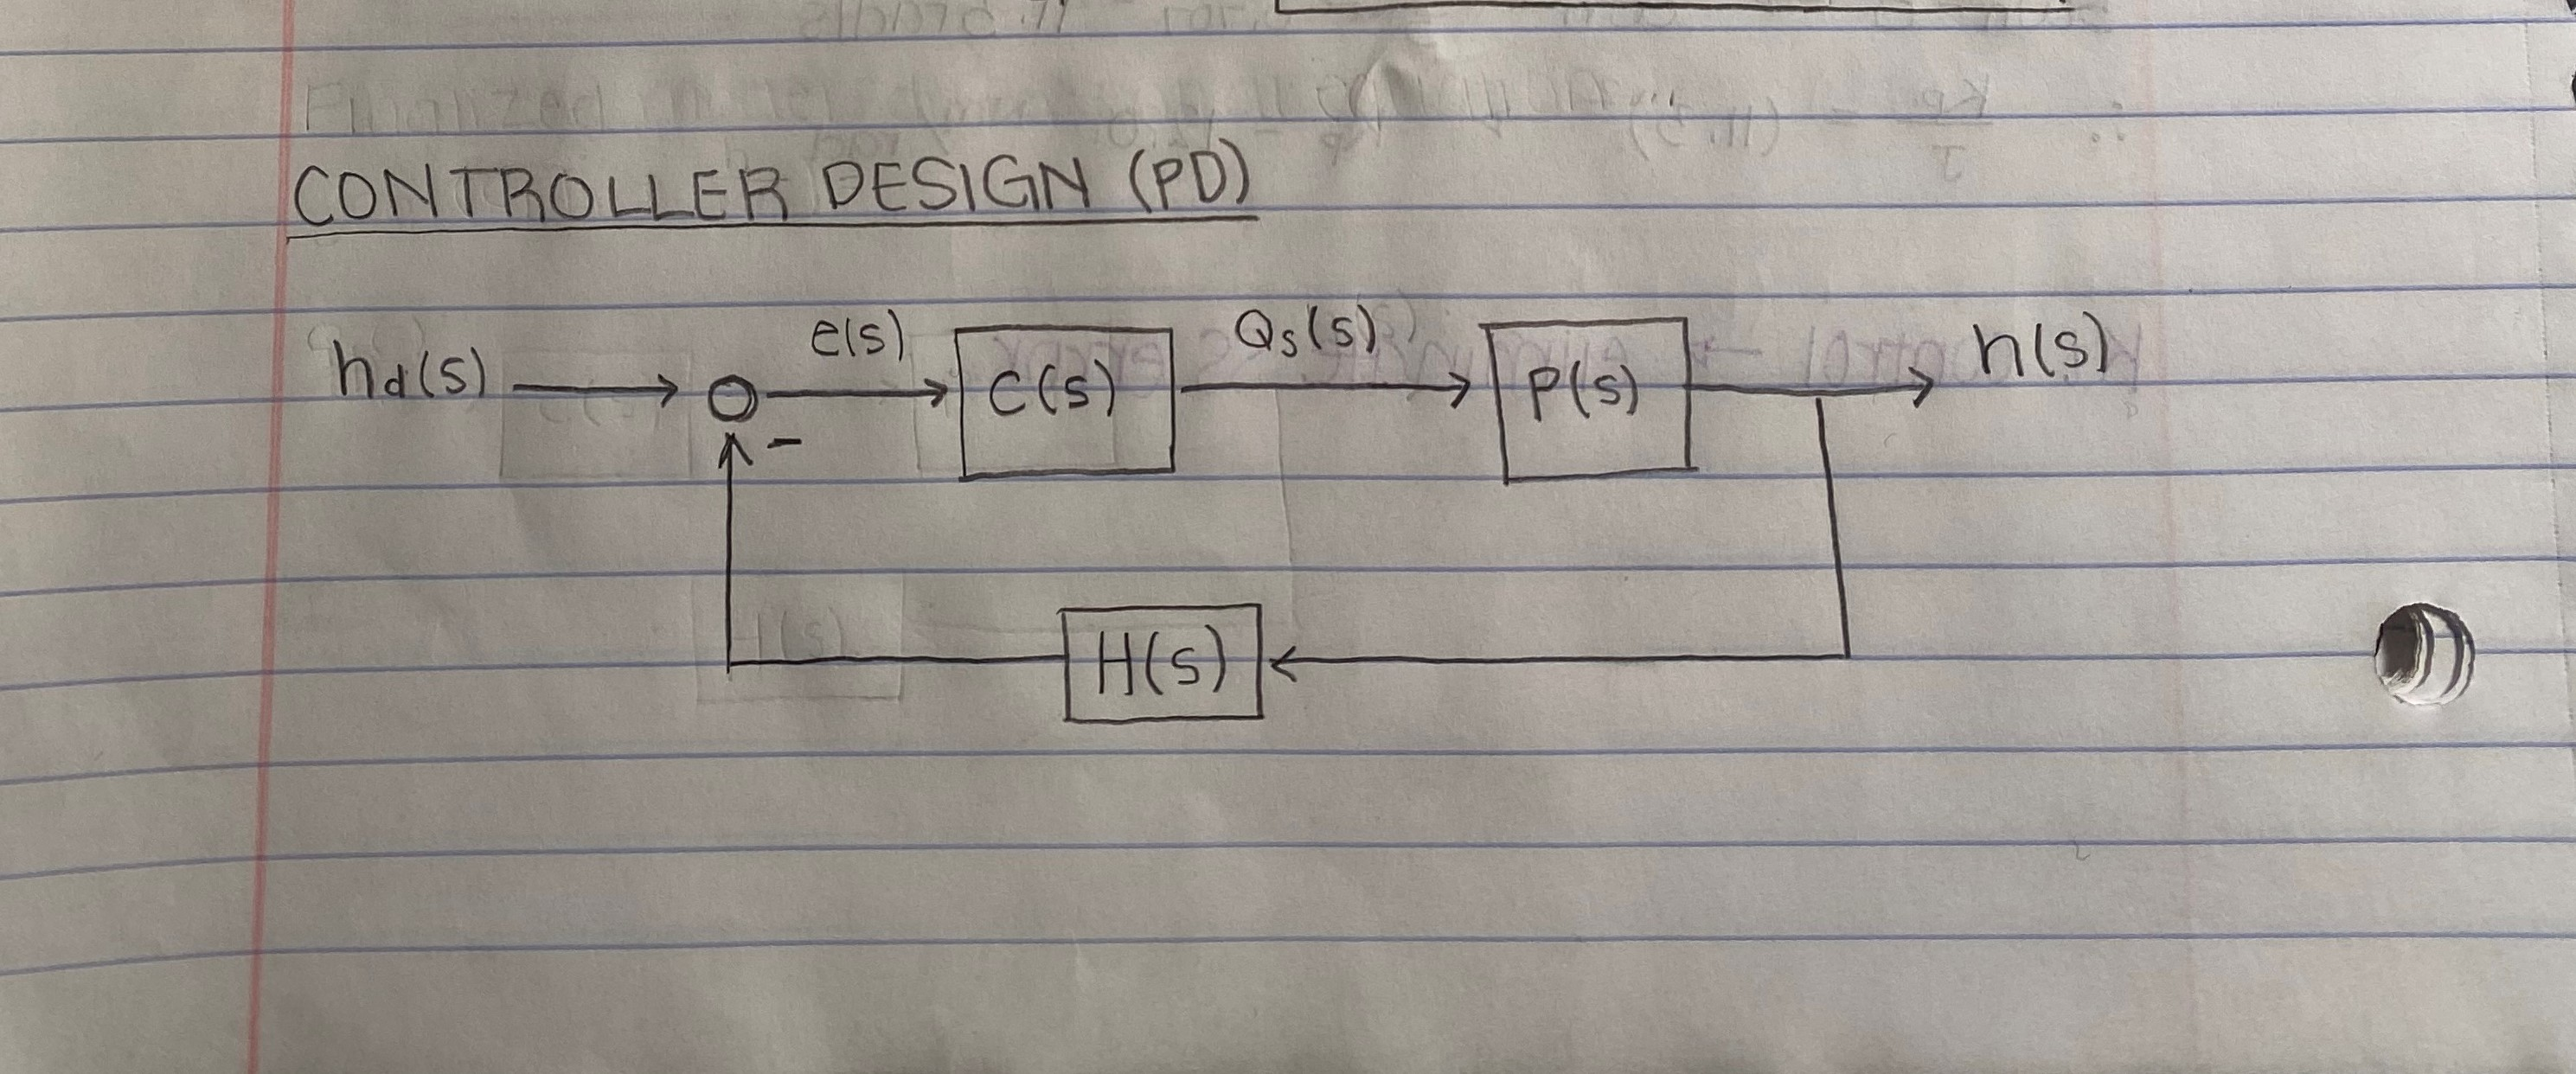

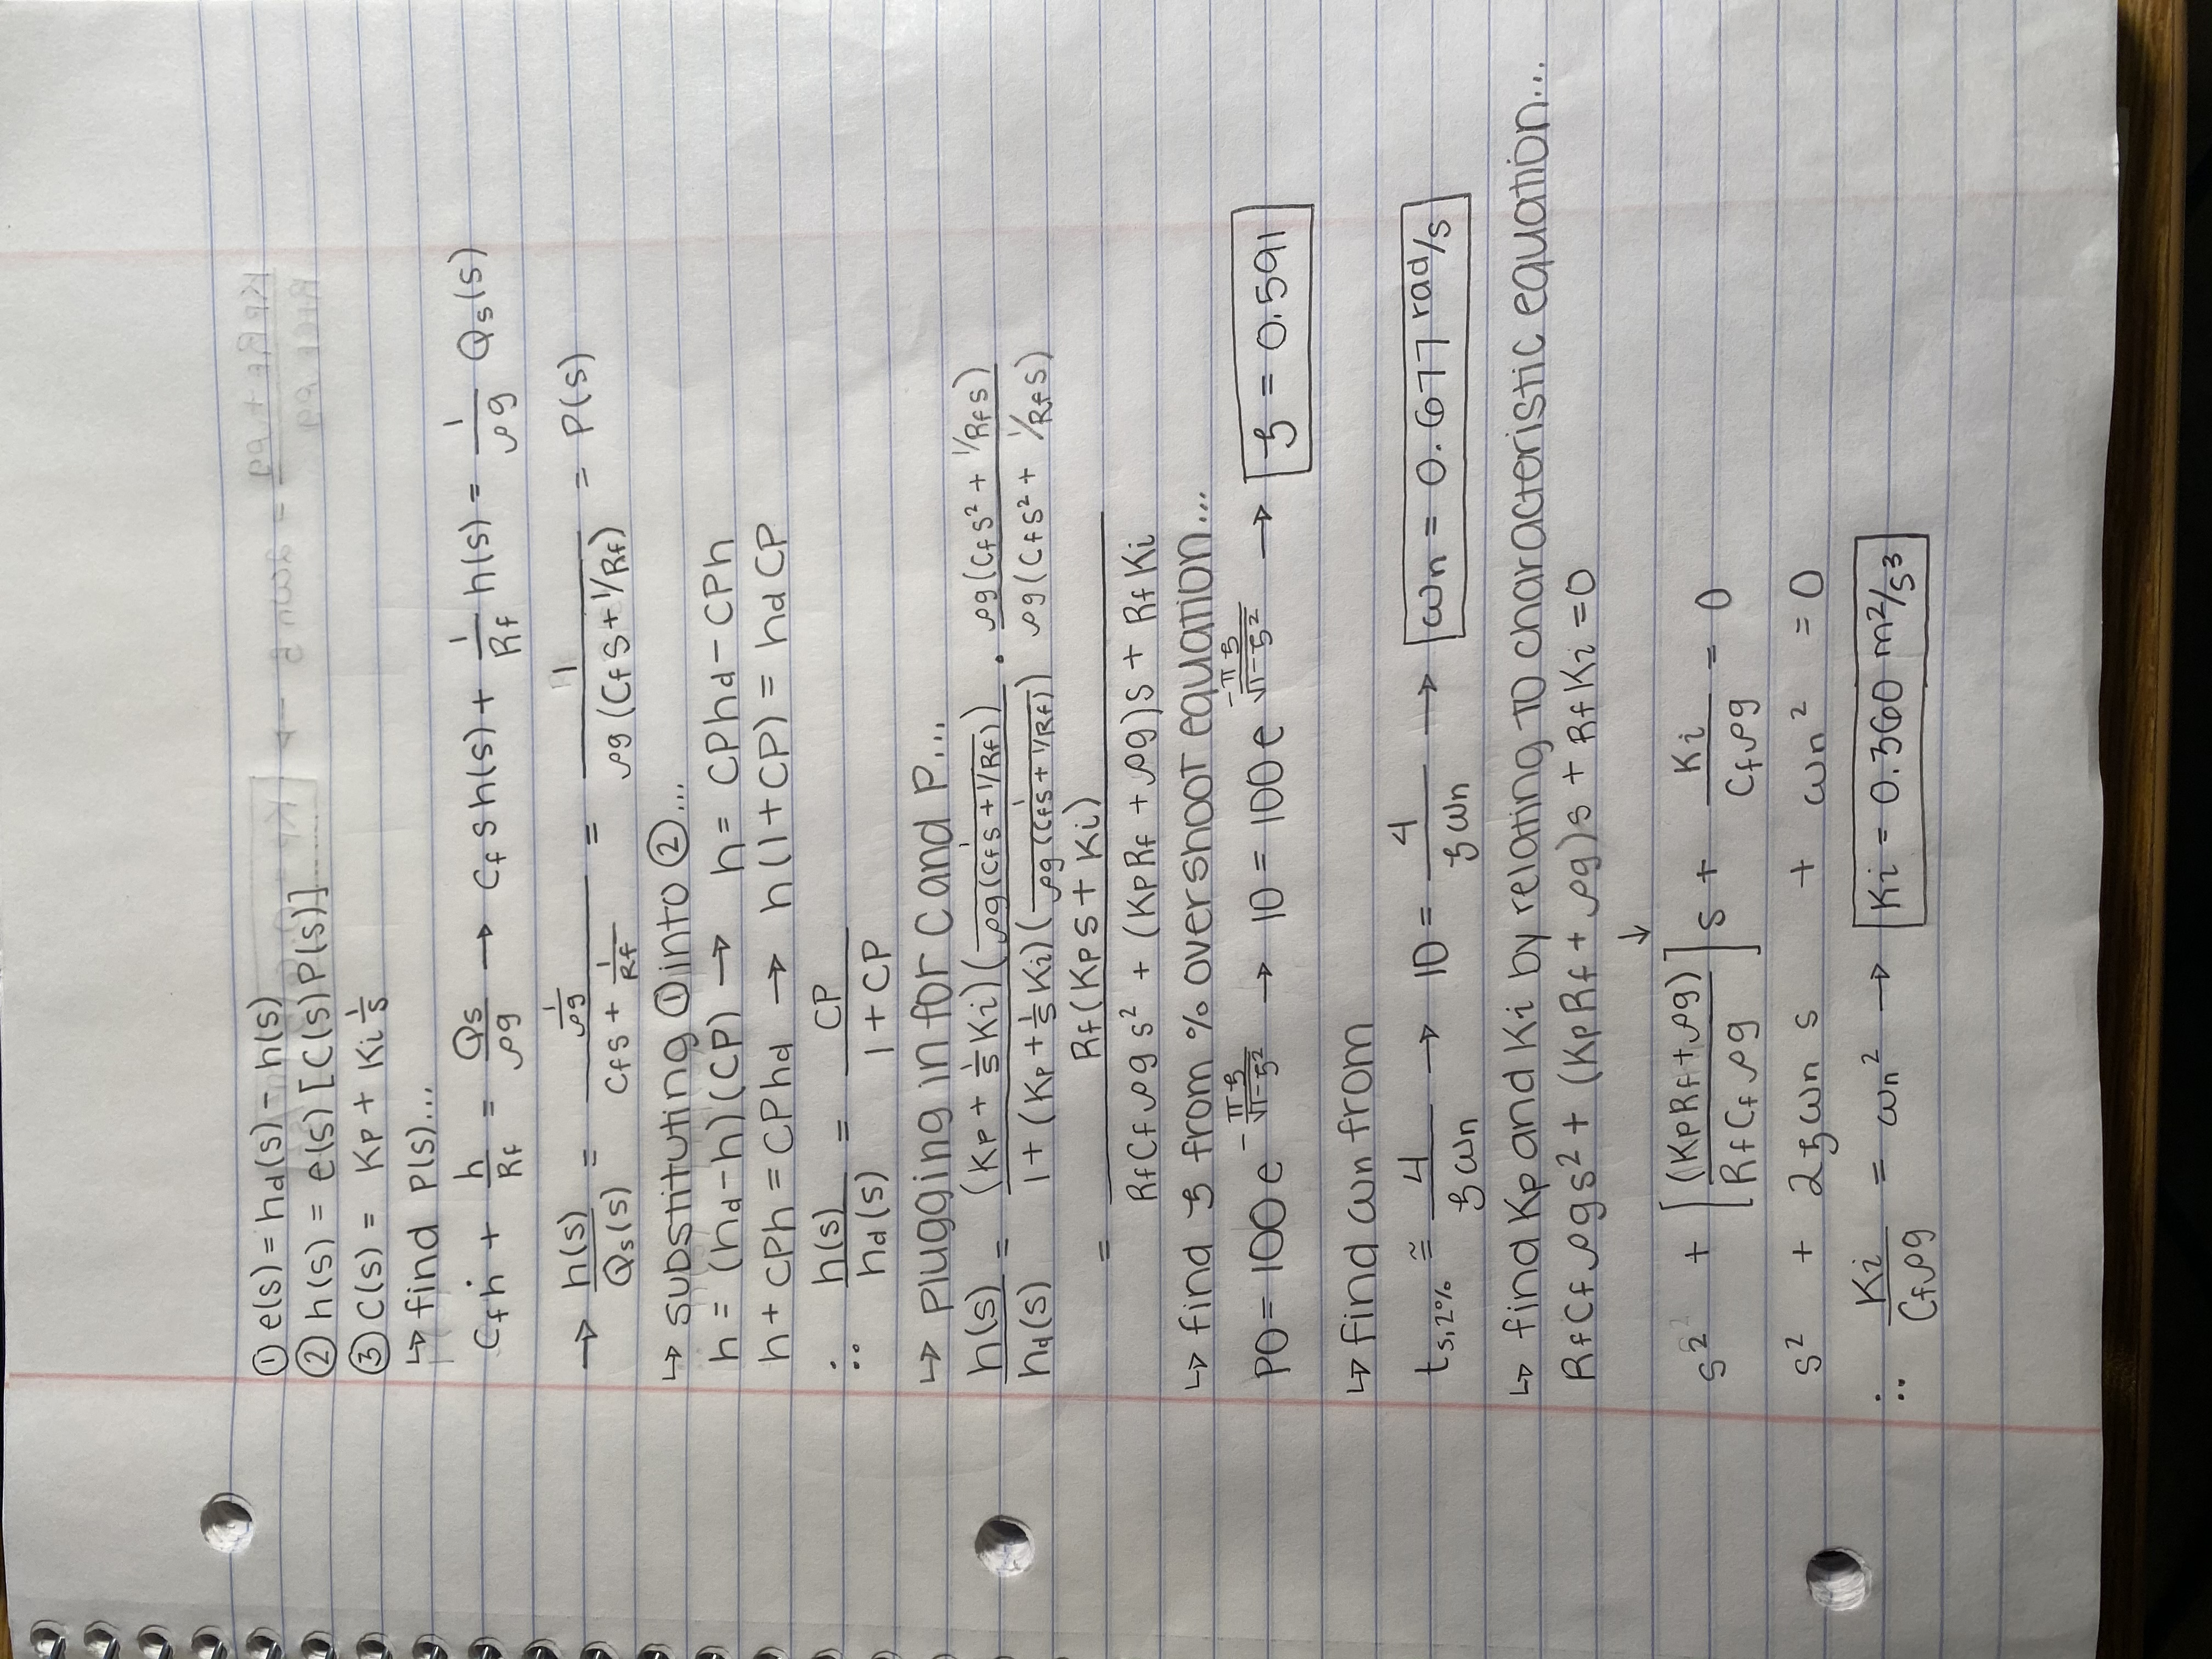

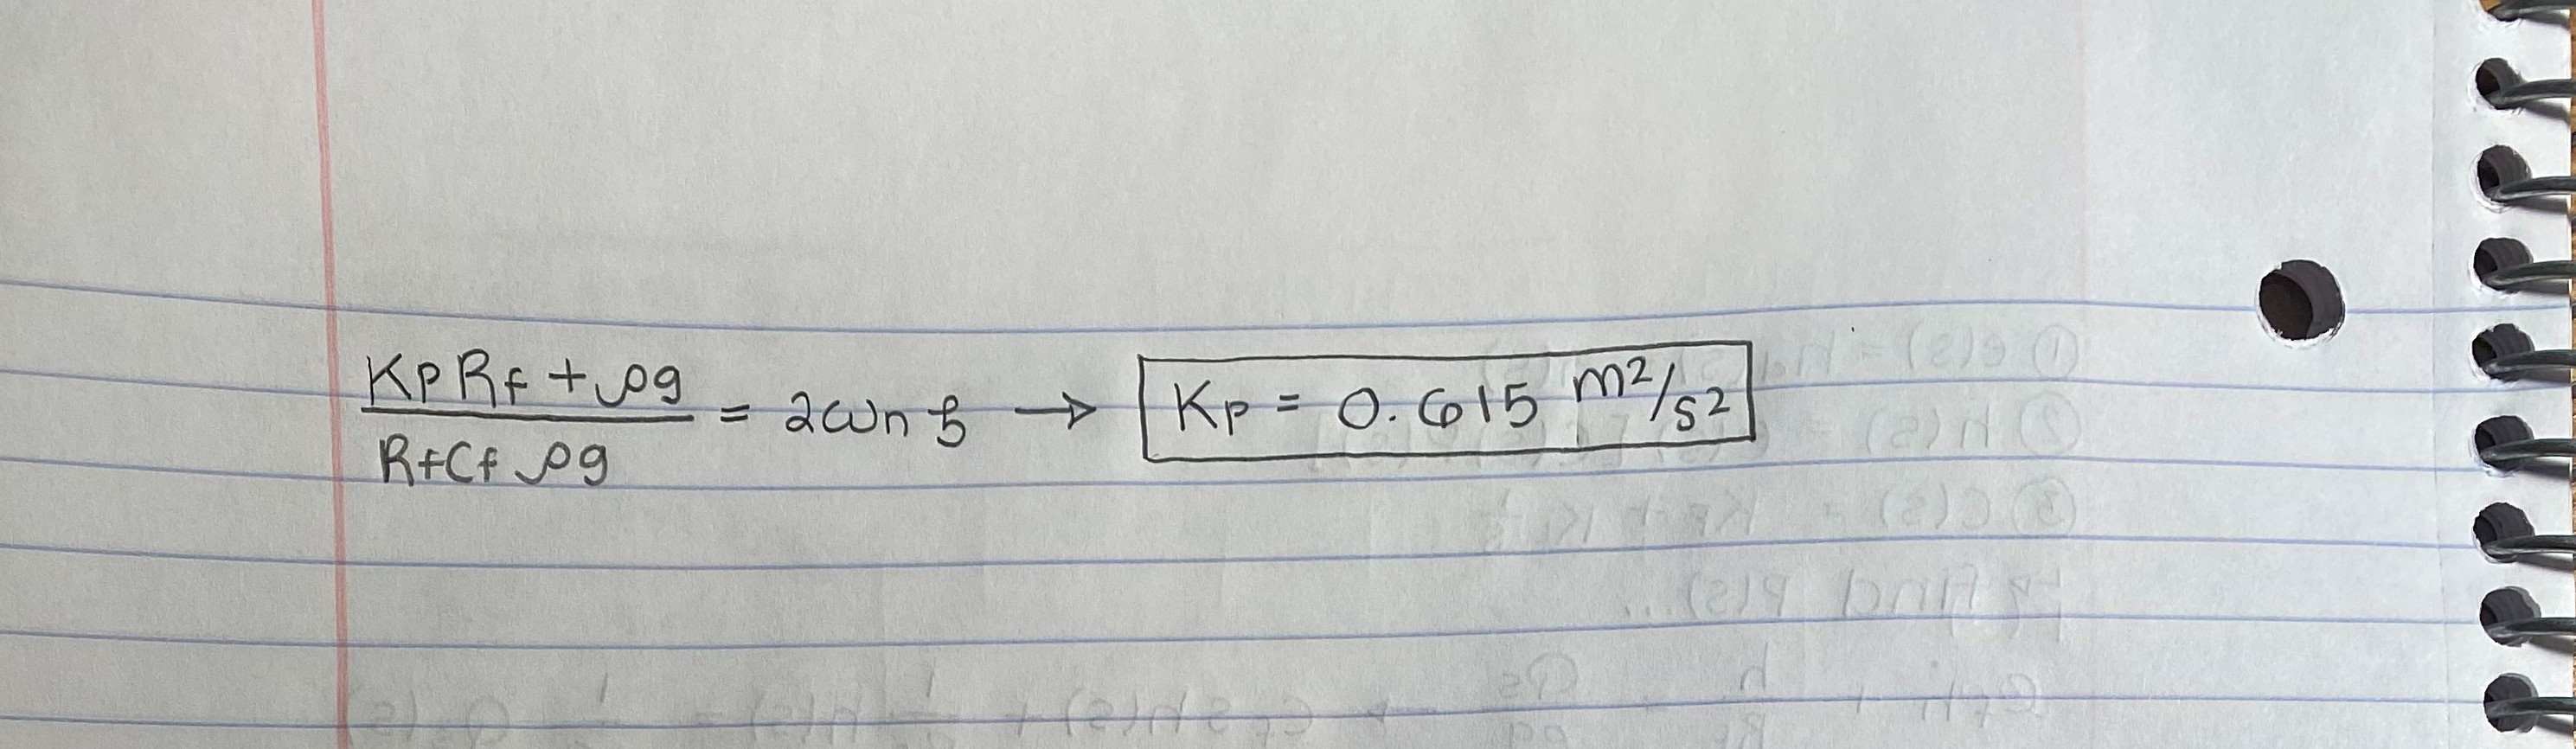

### Controller Validation: Simulation

Because we do not have a pond simulator for you do use to do an "Experiment," your validation for this assignment will be based on a closed-loop simulation only.  This means you will only be able to determine if your **model** meets the design criteria.  Like many engineers designing controllers, you will have to wait for some other nerve wracking day where your controller is used on a real system to see if your model was really any good!

But for now, you will simulate a circumstance where your friend realizes the pond height is too low and increases the desired pond height by 0.1m. Use the code cell below to simulate your predicted results for your closed-loop controller and confirm that your design specifications have been met!

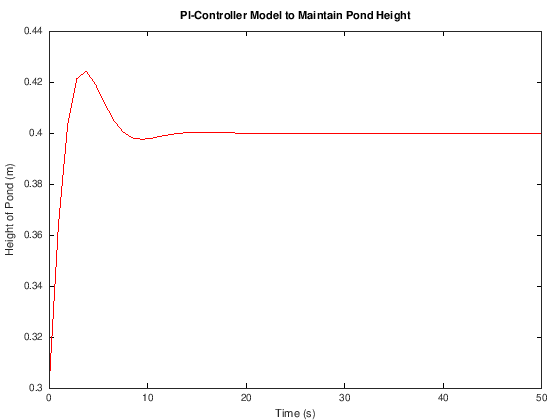

In [14]:
%Set up parameters of the model
Cf = 8.03E-5;
Rf = 7.29E5;
Ki = 0.359581;
Kp = 0.614684;
rho = 997;
g = 9.81;
hbar = 0.3;

% P Controller Model...
s = tf('s');
P = 1/(rho*g*(Cf*s+(1/Rf)));
C = Kp + (1/s)*Ki;
Gcl = P*C/(1+P*C);

[ysim,tsim]=step(Gcl,50);
ysim= (0.1*ysim)+hbar;

% plotting...
figure
plot(tsim,ysim,'r')
xlabel('Time (s)')
ylabel('Height of Pond (m)')
title('PI-Controller Model to Maintain Pond Height')
